Física Experimental Básica: Ondas e Óptica

In [102]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

35.706 1.1487479760434836
1.13564 0.005416957171697041 1.985412 0.006357056001011789
0.020964526228733456 0.0003018876521001887 0.016408363636363638 0.000302924597040888
0.00165 0.0001
0.01868644493254855 0.00030240612457053836


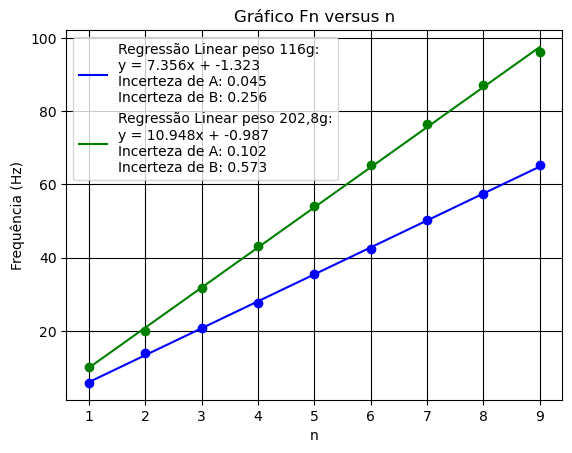

In [96]:
#Exp1.: Ondas Estacionárias em uma Corda
# Dados
f_116 = np.array([5.81, 14.00, 20.81, 27.76, 35.45, 42.50, 50.20, 57.30, 65.30])
f_202 = np.array([10.08, 19.93, 31.76, 43.20, 54.00, 65.20, 76.40, 87.10, 96.10])
n = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Função para calcular coeficientes e incertezas
def linear_regression_with_uncertainty(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    slope_uncertainty = std_err
    intercept_uncertainty = std_err * np.sqrt(np.mean(x**2))
    return slope, intercept, slope_uncertainty, intercept_uncertainty

# Regressão linear 116g
slope_116, intercept_116, slope_uncertainty_116, intercept_uncertainty_116 = linear_regression_with_uncertainty(n, f_116)
f_116_fit = slope_116 * n + intercept_116

# Regressão linear 202g
slope_202, intercept_202, slope_uncertainty_202, intercept_uncertainty_202 = linear_regression_with_uncertainty(n, f_202)
f_202_fit = slope_202 * n + intercept_202

# Plotagem dos dados e das regressões
plt.plot(n, f_116_fit, 'b-', label=f'Regressão Linear peso 116g:\ny = {slope_116:.3f}x + {intercept_116:.3f}\n'
                                  f'Incerteza de A: {slope_uncertainty_116:.3f}\n'
                                  f'Incerteza de B: {intercept_uncertainty_116:.3f}')
plt.plot(n, f_202_fit, 'g-', label=f'Regressão Linear peso 202,8g:\ny = {slope_202:.3f}x + {intercept_202:.3f}\n'
                                  f'Incerteza de A: {slope_uncertainty_202:.3f}\n'
                                  f'Incerteza de B: {intercept_uncertainty_202:.3f}')

plt.plot(n, f_116, 'bo')
plt.plot(n, f_202, 'go')
plt.xlabel('n')
plt.ylabel('Frequência (Hz)')
plt.title('Gráfico Fn versus n')
plt.legend()
plt.grid(True, color='k')
plt.savefig('grafico_fn_116.png', format='png')
#plt.show()
#-----------------------------------------------------------------------------------
#Calculo de incerteza

V2=2*1.623*11
Delta_V2=math.sqrt((2*11*0.05)**2+(2*1.623*0.102)**2)
print (V2,Delta_V2)

m_1=116*10**(-3)
delta_m1=0.5*10**(-3)
m_2=202.8*10**(-3)
delta_m2=0.5*10**(-3)
a=9.79
delta_a=0.02
tau_1=m_1*a
tau_2=m_2*a
delta_tau1=math.sqrt((m_1*delta_a)**2+(a*delta_m1)**2)
delta_tau2=math.sqrt((m_2*delta_a)**2+(a*delta_m2)**2)
print(tau_1,delta_tau1,tau_2,delta_tau2)

A_1=7.36
delta_A1=0.05
mu_1=tau_1/A_1**2
delta_mu1=math.sqrt(((1/(A_1)**2)*delta_tau1)**2+(((-2*tau_1)/(A_1)**3)*delta_A1)**2)
A_2=11
delta_A2=0.1
mu_2=tau_2/A_2**2
delta_mu2=math.sqrt(((1/(A_2)**2)*delta_tau2)**2+(((-2*tau_2)/(A_2)**3)*delta_A2)**2)
print (mu_1,delta_mu1,mu_2,delta_mu2)

mu=(0.33*10**(-3))/(20*10**(-2))
delta_mu=mu*math.sqrt((0.02/0.33)**2)
print (mu,delta_mu)

mu_med=(mu_1+mu_2)/2
delta_mumed=(delta_mu1+delta_mu2)/2
print (mu_med,delta_mumed)

omega:15.176776104298519
constante k:45.974772770833304 
incerteza de k:0.11591036192967163 
Amplitude: 0.025013717973818184
incerteza de A: 7.539880078855272e-05
k_1: 5.4245283018867925


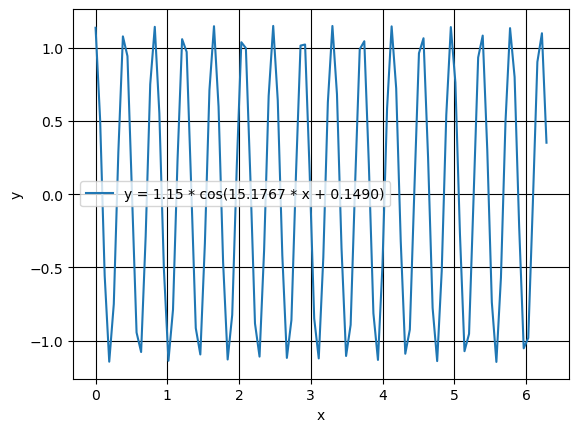

In [39]:
#Exp2.: Movimento Harmônio Simples
# Dados
x = 0.163
incerteza_x = 0.0005
Delta_x = 0.212
incerteza_delta = 0.0005
m = 0.1996
incerteza_m = 0.0005
F_max = 1.15
incerteza_F = 0.0019
T = 0.414
incerteza_T = 5.9 * 10**(-5)
phi = 0.1490
incerteza_phi = 0.0002

# Cálculo de omega
w = 2 * math.pi / T
incerteza_w = (2 * math.pi / T**2) * incerteza_T

# Cálculo de k
k = m * w**2
incerteza_k = k * math.sqrt((incerteza_m / m)**2 + (2 * incerteza_w / w)**2)

# Cálculo de A
A = F_max / k
incerteza_A = A * math.sqrt((incerteza_F / F_max)**2 + (incerteza_k / k)**2)

# Cálculo de k_1
k_1 = F_max / Delta_x

# Cálculo de y
y = F_max * math.cos(w * x + phi)

# Exibir os resultados
print('omega:{}'.format(w))
print('constante k:{} '.format(k))
print('incerteza de k:{} '.format(incerteza_k))
print('Amplitude: {}'.format(A))
print('incerteza de A: {}'.format(incerteza_A))
print('k_1: {}'.format(k_1))

# Gráfico
x_values = np.linspace(0, 2 * math.pi, 100)
y_values = F_max * np.cos(w * x_values + phi)

plt.plot(x_values, y_values, label='y = 1.15 * cos(15.1767 * x + 0.1490)')
#plt.scatter(x, y, color='red', label='Ponto calculado')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, color='k')
plt.legend()
plt.savefig('grafico.png', format='png')


-37.802329053448794 2.372142770111132 22.889220662884444 0.9918118297536551


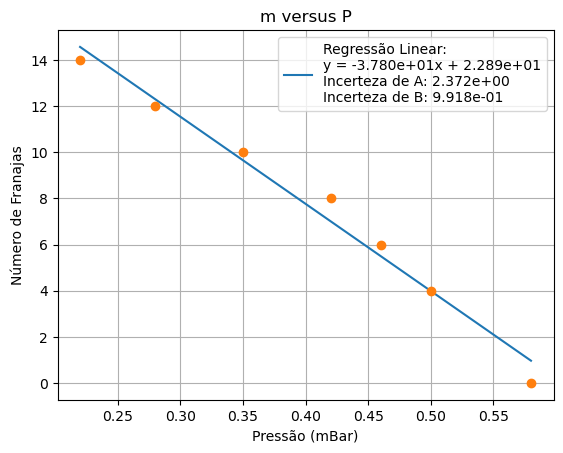

In [41]:
#Exp3.: Interferômetro de Michelson
m=np.array([0,4,6,8,10,12,14])
p=np.array([580,500,460,420,350,280,220])
# Função para calcular coeficientes e incertezas
p1=p*10**(-3)
def linear_regression_with_uncertainty(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    slope_uncertainty = std_err
    intercept_uncertainty = std_err * np.sqrt(np.mean(x**2))
    return slope, intercept, slope_uncertainty, intercept_uncertainty
    
# Regressão linear
slope, intercept, slope_uncertainty, intercept_uncertainty = linear_regression_with_uncertainty(p1, m)
m_fit = slope * p1 + intercept

# Plotagem
plt.plot(p1, m_fit, '-', label=(f'Regressão Linear:\ny = {slope:.3e}x + {intercept:.3e}\n'
                               f'Incerteza de A: {slope_uncertainty:.3e}\n'
                               f'Incerteza de B: {intercept_uncertainty:.3e}'))

plt.plot (p1,m,'o')
plt.xlabel ('Pressão (mBar)')
plt.ylabel ('Número de Franajas')
plt.title ('m versus P')
plt.legend()
plt.savefig('grafico_mp.png', format='png')
plt.grid (True)
print (slope,slope_uncertainty,intercept,intercept_uncertainty)

v1 0.281, incerteza 0.00935 e v2 0.365, incerteza 0.012
tc1 8.875, incerteza 0.29521 e tc2 6.847, incerteza 0.228
valor de C 0.0000788, valor de R é 47, tau é 0.004 e sua incerteza é 0.0001232
y01 = 0.094 ± 0.011
A11 = 574.196 ± 66530406.547
x01 = -14.083 ± 483680.807
t11 = 4.174 ± 0.013
y02 = -0.082 ± 0.142
A12 = 7.872 ± 4944807.284
x02 = 6.826 ± 4663433.229
t12 = 7.424 ± 0.138


/tmp/ipykernel_165/2322896914.py:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(p, exponential_decay(p, *params1), 'b-',


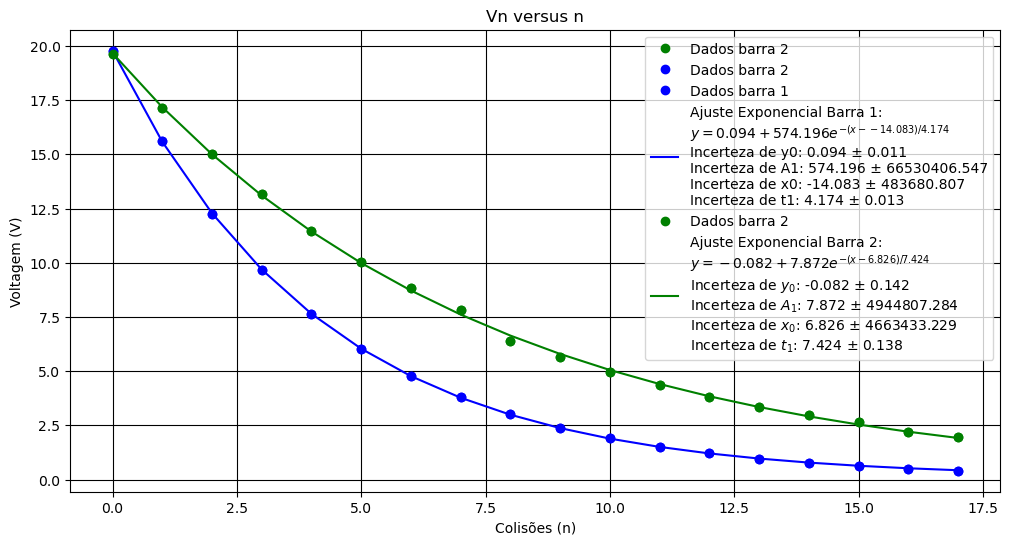

In [134]:
#Exp4.: Velocidade do Som em Metais
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Barra 1: (124,7\pm0,05)cm
V_11=np.array([19.79,15.57,12.31,9.74,7.71,6.11,4.84,3.83,3.04,2.41,1.90,1.52,1.22,0.98,0.78,0.62,0.49,0.4])
V_12=np.array([19.75,15.52,12.19,9.63,7.60,5.95,4.70,3.76,2.99,2.38,2.00,1.50,1.20,0.96,0.78,0.63,0.50,0.4])
V_13=np.array([19.79,15.69,12.26,9.65,7.60,5.99,4.75,3.79,2.99,2.30,1.87,1.55,1.22,0.96,0.78,0.63,0.51,0.42])
P=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
V1 =np.column_stack((V_11, V_12, V_13))
V_m1=np.mean(V1, axis=1)

#Barra 2: 1,2480\pm0,005
V_21=np.array([19.61,17.17,15.04,13.18,11.43,9.99,8.76,7.773,5.88,5.17,4.52,3.97,3.49,3.06,2.69,2.42,2.13,1.89])
V_22=np.array([19.63,17.09,14.99,13.12,11.54,10.10,8.88,7.83,6.91,6.09,5.37,4.72,4.15,3.67,3.24,2.89,2.26,1.99])

V2=np.column_stack((V_21,V_22))
V_m2=np.mean(V2, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(P,V_m2,'go',label='Dados barra 2')
plt.plot(P,V_m1,'bo',label='Dados barra 2')

#plt.plot(V_m2,P,'bo',label='Dados barra 2')
#plt.plot (V_m1,P,'go',label='Dados barra 1')
plt.xlabel ('Colisões (n)')
plt.ylabel ('Voltagem (V)')
plt.title ('Vn versus n')
plt.legend ()
plt.grid (True,color='k')
#------------------------------------------------------------------------------------------------------------------

#Calculo de tau=RC e incertezas
c=78.8*10**(-6)
delta_c=2.5*10**(-6)
r=47
delta_r=0.47
tau=r*c
delta_tau=tau*math.sqrt((delta_c/c)**2+(delta_r/r)**2)
t1=4.1733*10**(-4)
delta_t1=0.0005*10**(-4)
t2=5.409*10**(-4)
delta_t2=0.002*10**(-4)
tc1= tau/t1
delta_tc1=tc1*math.sqrt((delta_tau/tau)**2+(delta_t1/t1)**2)
tc2=tau/t2
delta_tc2=tc2*math.sqrt((delta_tau/tau)**2+(delta_t2/t2)**2)
l1=1.247
delta_l1=0.0005
v1=2*l1/tc1
delta_v1=v1*math.sqrt((delta_l1/l1)**2+(delta_tc1/tc1)**2)
l2=1.248
delta_l2=0.0005
v2=2*l2/tc2
delta_v2=v2*math.sqrt((delta_l2/l2)**2+(delta_tc2/tc2)**2)
print ('v1 {:.3f}, incerteza {:.5f} e v2 {:.3f}, incerteza {:.3f}'. format (v1,delta_v1,v2,delta_v2))
print('tc1 {:.3f}, incerteza {:.5f} e tc2 {:.3f}, incerteza {:.3f}'.format (tc1,delta_tc1, tc2,delta_tc2))
print ('valor de C {:.7f}, valor de R é {}, tau é {:.3f} e sua incerteza é {:.7f}'.format(c,r,tau,delta_tau))

# 2. Definir a função exponencial no novo formato
def exponential_decay(x, y0, A1, x0, t1):
    return y0 + A1 * np.exp(-(x - x0) / t1)

# 3. Usar curve_fit para ajustar a função aos dados
initial_guess = [1, 1, 0, 1]  # Chute inicial para os parâmetros y0, A1, x0 e t1
params1, covariance1 = curve_fit(exponential_decay, p, V_m1, p0=initial_guess)
y01_fit, A11_fit, x01_fit, t11_fit = params1
y01_uncertainty, A11_uncertainty, x01_uncertainty, t11_uncertainty = np.sqrt(np.diag(covariance1))
# Extrair os parâmetros ajustados e suas incertezas
print(f"y01 = {y01_fit:.3f} ± {y01_uncertainty:.3f}")
print(f"A11 = {A11_fit:.3f} ± {A11_uncertainty:.3f}")
print(f"x01 = {x01_fit:.3f} ± {x01_uncertainty:.3f}")
print(f"t11 = {t11_fit:.3f} ± {t11_uncertainty:.3f}")

# 3. Usar curve_fit para ajustar a função aos dados
initial_guess = [0, 1, 0, 1]  # Chute inicial para os parâmetros y0, A1, x0 e t1
params2, covariance2 = curve_fit(exponential_decay, p, V_m2, p0=initial_guess)
y02_fit, A12_fit, x02_fit, t12_fit = params2
y02_uncertainty, A12_uncertainty, x02_uncertainty, t12_uncertainty = np.sqrt(np.diag(covariance2))
# Extrair os parâmetros ajustados e suas incertezas
print(f"y02 = {y02_fit:.3f} ± {y02_uncertainty:.3f}")
print(f"A12 = {A12_fit:.3f} ± {A12_uncertainty:.3f}")
print(f"x02 = {x02_fit:.3f} ± {x02_uncertainty:.3f}")
print(f"t12 = {t12_fit:.3f} ± {t12_uncertainty:.3f}")

# Plotagem dos resultados
#plt.figure(figsize=(12, 6))
# 4. Plotar os resultados barra 1
#plt.scatter(x_data, y_data, label='Dados', color='red')
plt.plot(p, V_m1,'bo',label='Dados barra 1')
plt.plot(p, exponential_decay(p, *params1), 'b-', 
         label=(f'Ajuste Exponencial Barra 1:\n'
                f'$y = {y01_fit:.3f} + {A11_fit:.3f} e^{{-(x - {x01_fit:.3f})/{t11_fit:.3f}}}$\n'
                f'Incerteza de y0: {y01_fit:.3f} ± {y01_uncertainty:.3f}\n'
                f'Incerteza de A1: {A11_fit:.3f} ± {A11_uncertainty:.3f}\n'
                f'Incerteza de x0: {x01_fit:.3f} ± {x01_uncertainty:.3f}\n'
                f'Incerteza de t1: {t11_fit:.3f} ± {t11_uncertainty:.3f}'), color='blue')

# 4. Plotar os resultados - barra 2
plt.plot(p, V_m2,'go',label='Dados barra 2')
plt.plot(p, exponential_decay(p, *params2), 'g-', 
         label=(f'Ajuste Exponencial Barra 2:\n'
                f'$y = {y02_fit:.3f} + {A12_fit:.3f} e^{{-(x - {x02_fit:.3f})/{t12_fit:.3f}}}$\n'
                f'Incerteza de $y_0$: {y02_fit:.3f} ± {y02_uncertainty:.3f}\n'
                f'Incerteza de $A_1$: {A12_fit:.3f} ± {A12_uncertainty:.3f}\n'
                f'Incerteza de $x_0$: {x02_fit:.3f} ± {x02_uncertainty:.3f}\n'
                f'Incerteza de $t_1$: {t12_fit:.3f} ± {t12_uncertainty:.3f}'))

plt.legend()
plt.grid(True)
plt.savefig('grafico_barra.png', format='png')

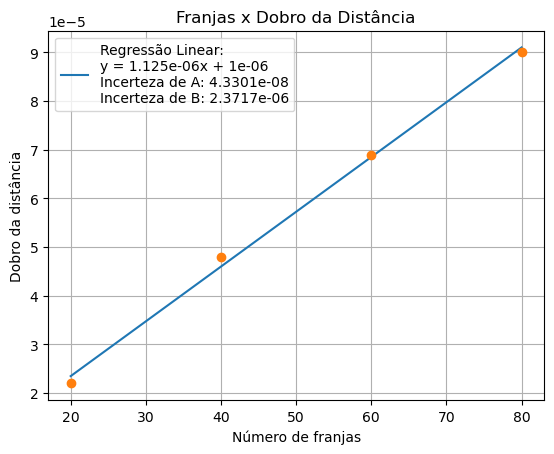

In [47]:
#Ecp5.: Interferência e Difração da Luz
d=np.array([11,24,34.5,45])
m=np.array([20,40,60,80])
y=d*2*10**(-6)
x=m

# Função para calcular coeficientes e incertezas
def linear_regression_with_uncertainty(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    slope_uncertainty = std_err
    intercept_uncertainty = std_err * np.sqrt(np.mean(x**2))
    return slope, intercept, slope_uncertainty, intercept_uncertainty
# Regressão linear
slope, intercept, slope_uncertainty, intercept_uncertainty = linear_regression_with_uncertainty(x, y)
y_fit = slope * x + intercept
    
plt.plot(x,y_fit, '-', label=(f'Regressão Linear:\ny = {slope:.5}x + {intercept:.5}\n'
                                  f'Incerteza de A: {slope_uncertainty:.5}\n'
                                  f'Incerteza de B: {intercept_uncertainty:.5}'))
plt.plot(x,y,'o')
plt.xlabel('Número de franjas')
plt.ylabel('Dobro da distância')
plt.title('Franjas x Dobro da Distância')
plt.legend()
plt.grid (True)


[0.0, 0.17410813759359595, 0.34195826345027663, 0.5003474302699141, 0.6426867154479664, 0.76625997428787, 0.8659266112878228, 0.9397847691554189, 0.9847619796425121]
[0.0, 0.12169758381254774, 0.2753944551081661, 0.3588168268553916, 0.5003474302699141, 0.5736868215480125, 0.5875275257138919, 0.6823701079509082, 0.76625997428787]
0.6989770006995011


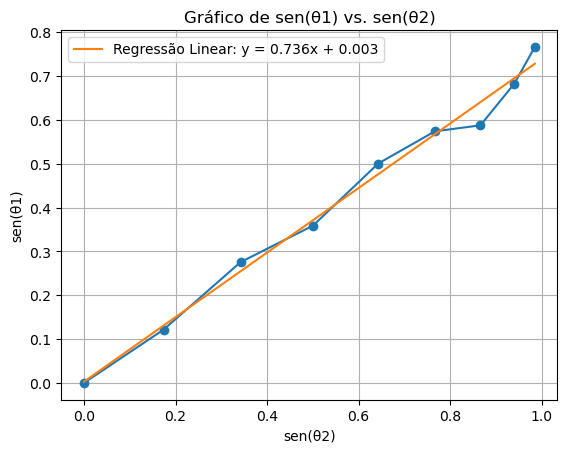

In [43]:
#Exp8. Refração e Reflexão da Luz
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
import pandas as pd

def lei_de_snell (n1,theta_1,theta_2):
    n2=(n1*math.sin(theta_1))/math.sin(theta_2)
    return n2

#grafico com sen(theta_1)xsen(theta_1)
theta_1 = (0,0.175,0.349,0.524,0.698,0.873,1.047,1.222,1.396)
theta_2 = (0,0.122,0.279,0.367,0.524,0.611,0.628,0.751,0.873)
sen_theta1=[math.sin(num) for num in theta_1]
print (sen_theta1)
sen_theta2=[math.sin(num) for num in theta_2]
print (sen_theta2)
# Regressão linear
coefficients = np.polyfit(sen_theta1, sen_theta2, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)  # Objeto polinomial
sen_theta2_fit = poly(sen_theta1)  # Valores ajustados
n_2=math.sin(0.122)/math.sin(0.175)
print (n_2)

plt.title('Gráfico de sen(θ1) vs. sen(θ2)')
plt.ylabel('sen(θ1)') #leg eixo x
plt.xlabel('sen(θ2)') #leg eixo y
plt.plot(sen_theta1, sen_theta2, marker='o')

plt.plot(sen_theta1, sen_theta2_fit, '-', label=f'Regressão Linear: y = {coefficients[0]:.3f}x + {coefficients[1]:.3f}')
plt.savefig('grafico_sen_theta.png', format='png')
plt.legend() #gera a leg
plt.grid(True)
plt.show()
